In [1]:
import pandas as pd
df = pd.read_excel('Prediction_Database.xlsx')
sf = pd.read_excel('test1.xlsx')
df

,Price,Area,Type_Score,Rail_Score,Hospital_Score,24Hrs Water Supply,24Hrs Backup Electricity,Lift,Gated Community,Club House,Parking
0,36.34,790,3.0,0.364190,5.509420,1,0,1,1,0,1
1,75.00,1500,3.5,0.129975,0.812521,1,1,1,1,0,1
2,93.80,1340,2.5,0.279784,1.044609,1,1,1,0,0,1
3,51.17,1190,2.0,0.167251,0.930651,1,1,1,1,0,1
4,68.00,1125,2.5,0.109995,1.132096,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2745,144.00,2412,3.0,0.134107,0.625462,1,1,1,1,1,1
2746,33.46,1287,2.5,1.761997,2.418640,0,1,0,1,0,0
2747,115.00,1655,3.0,0.127078,0.835416,1,1,1,0,1,1
2748,124.00,1880,3.0,0.258999,2.076649,1,0,1,1,1,1


In [2]:
df.isnull().sum()

Price                       0
Area                        0
Type_Score                  0
Rail_Score                  0
Hospital_Score              0
24Hrs Water Supply          0
24Hrs Backup Electricity    0
Lift                        0
Gated Community             0
Club House                  0
Parking                     0
dtype: int64

In [3]:
X = df.drop(columns = 'Price')
X_predict = sf
X

,Area,Type_Score,Rail_Score,Hospital_Score,24Hrs Water Supply,24Hrs Backup Electricity,Lift,Gated Community,Club House,Parking
0,790,3.0,0.364190,5.509420,1,0,1,1,0,1
1,1500,3.5,0.129975,0.812521,1,1,1,1,0,1
2,1340,2.5,0.279784,1.044609,1,1,1,0,0,1
3,1190,2.0,0.167251,0.930651,1,1,1,1,0,1
4,1125,2.5,0.109995,1.132096,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2745,2412,3.0,0.134107,0.625462,1,1,1,1,1,1
2746,1287,2.5,1.761997,2.418640,0,1,0,1,0,0
2747,1655,3.0,0.127078,0.835416,1,1,1,0,1,1
2748,1880,3.0,0.258999,2.076649,1,0,1,1,1,1


In [4]:
y = df['Price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_predict_scaler = scaler.transform(X_predict)

In [7]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
X_predict_poly = poly.transform(X_predict_scaler)
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [9]:
c = lin.intercept_

In [10]:
c

304.9046096597064

In [11]:
m = lin.coef_
m

array([ 2.60744148e-08,  7.21001356e+00,  3.24982243e+01, ...,
       -2.39910517e+01,  4.86478119e+01, -2.16971477e+01])

In [12]:
y_pred = lin.predict(X_test_poly)
predicted_price = lin.predict(X_predict_poly)

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

127.0122202415496

In [14]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

15.344081370933933

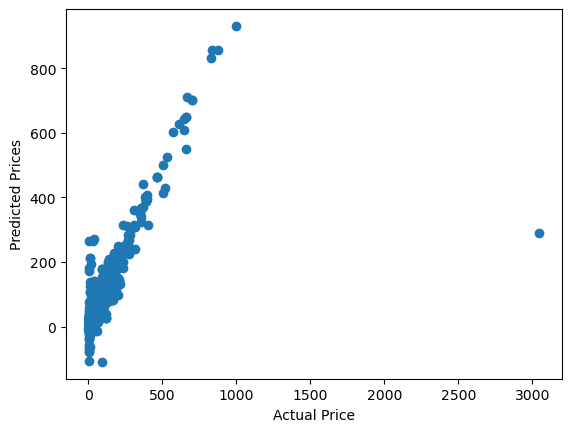

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.show()

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_train, y_pred_train)

0.589244593688183

In [19]:
X_test_scaler[0]

array([ 0.2791015 ,  0.77235287, -0.17352936,  0.05056413, -1.19846709,
        0.77911002, -1.32547811,  0.7813717 , -0.68313005, -1.36005181])

In [20]:
y_pred_train

array([56.78894852, 84.3359523 , 41.95351912, ..., -5.91672024,
       67.96165082, 81.02082136])

In [21]:
coefficients = lin.coef_
intercept = lin.intercept_
equation = "y = {:.2f}".format(intercept)
for i in range(1, len(coefficients)):
    equation += " + {:.2f}x^{}".format(coefficients[i], i)

print("The regression equation is:", equation)

The regression equation is: y = 304.90 + 7.21x^1 + 32.50x^2 + 141.13x^3 + -22.98x^4 + 30.73x^5 + -8.36x^6 + -34.92x^7 + 12.25x^8 + 3.83x^9 + 14.53x^10 + -21.84x^11 + 31.76x^12 + 41.03x^13 + -14.41x^14 + 4.90x^15 + 12.18x^16 + 50.99x^17 + 11.34x^18 + 2.52x^19 + -34.72x^20 + 5.78x^21 + 1.63x^22 + 9.65x^23 + -26.81x^24 + -18.64x^25 + -39.63x^26 + -8.03x^27 + -9.59x^28 + -38.40x^29 + -42.34x^30 + 191.89x^31 + 64.81x^32 + -51.94x^33 + -338.76x^34 + 43.04x^35 + -31.39x^36 + 92.07x^37 + 9.18x^38 + 90.34x^39 + 29.39x^40 + -31.16x^41 + 2.62x^42 + 45.36x^43 + 80.20x^44 + -11.19x^45 + -6.00x^46 + -36.77x^47 + 4.99x^48 + 0.72x^49 + -11.28x^50 + 4.22x^51 + 15.18x^52 + -6.88x^53 + -10.02x^54 + -19.76x^55 + 19.94x^56 + -35.22x^57 + -29.81x^58 + -63.65x^59 + -6.10x^60 + 2.61x^61 + 10.41x^62 + 2.99x^63 + 36.71x^64 + -9.08x^65 + 25.62x^66 + 12.91x^67 + 9.39x^68 + -102.49x^69 + -19.79x^70 + -47.95x^71 + 112.59x^72 + -20.38x^73 + 12.90x^74 + -12.27x^75 + -0.48x^76 + 52.51x^77 + 65.18x^78 + 76.01x^79 + 57.

In [22]:
predicted_price

array([141.80229385])